In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import pandas as pd

# Die Normalverteilung

Die Normalverteilung benutzt man zur Beschreibung vieler zufälliger Vorgänge, z.B.

* zufällige Messfehler,
* zufällige Abweichungen von einem Nennmaß bei der Produktion,
* zufällige Kursschwankungen am Aktienmarkt

Ihre herausragende Bedeutung in der Statistik beruht auf dem zentralen Grenzwertsatz: Die Überlagerung vieler zufälliger unabhängiger Ereignisse folgt annähernd einer Normalverteilung.

### Beispiel: Das Gewicht von Brötchen
Das folgende Bild zeigt Ranga Yogeshwar in der Sendung [Quarks und Co. "Die Wissenschaft vom Zufall" vom 12.11.2002](http://www.wdr.de/tv/quarks/sendungsbeitraege/2002/1112/000_wissens.jsp). Er demonstriert, dass das Gewicht von Brötchen annähernd einer Normalverteilung folgt.

![quraks](quarks_co_wissenschaft_vom_zufall.png "Quarks und Co.")


In [1]:
from IPython.display import Video
Video('Die_Wissenschaft_vom_Zufall_-_Normalverteilung.mp4')

In [2]:
from datetime import timedelta
from IPython.display import YouTubeVideo
start=int(timedelta(hours=0, minutes=15, seconds=45).total_seconds())
YouTubeVideo("_wziEUZXpwg", start=start, autoplay=1, theme="light", color="red")  # original: FOs0kE6QPF4

In [3]:
from IPython.display import IFrame
IFrame('//dailymotion.com/embed/video/x2or8pw', 2*350, 2*240)

## Die Dichtefunktion der Normalverteilung

Wegen ihrer Form wird die Dichtefunktion

$$f(x, \mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}}$$

der Normalverteilung auch Gaußsche Glockenkurve genannt.

![Gaußsche Glockenkurve](https://upload.wikimedia.org/wikipedia/commons/0/0d/10_DM_Serie4_Vorderseite.jpg)

Die Kurve ist symmetrisch zu ihrem Maximum, der $x$-Wert des Maximums ist der Erwartungswert $\mu$ und die Breite der Glocke wird durch die Standardabweichung $\sigma$ beschrieben. $\sigma^2$ heißt Varianz. Seien Messwerte normalverteilt, dann finden sich

* 68.3% aller Messwerte im Intervall $[\mu-\sigma, \mu+\sigma]$,
* 95.5% aller Messwerte im Intervall $[\mu-2\sigma, \mu+2\sigma]$
* 99.7% aller Messwerte im Intervall $[\mu-3\sigma, \mu+3\sigma]$

Die Standardnormalverteilung erhält man mit $\mu = 0$ und $\sigma = 1$.

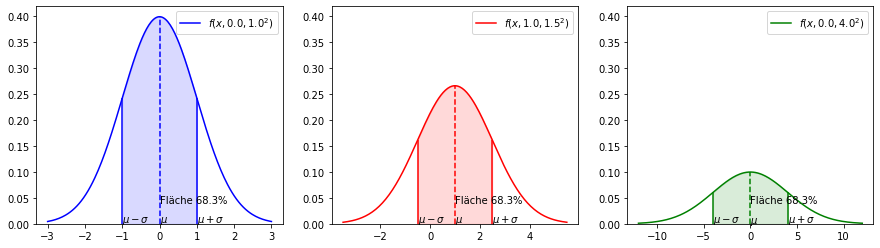

In [15]:
mus = [0,1,0]
sigmas = [1,1.5,4]
colors = ['blue','red','green']
fig, axes = plt.subplots(1, len(mus), figsize=(15,4))

for mu, sigma, color, ax in zip(mus, sigmas, colors, axes):
    x = np.linspace(mu-3*sigma,mu+3*sigma,200)
    y = norm.pdf(x,mu,sigma)
    ax.plot(x,y,color, label=u'$f(x,%.01f,%.01f^2)$'%(mu,sigma))
    x = np.linspace(mu-sigma,mu+sigma,100)
    y = norm.pdf(x,mu,sigma)
    ax.fill_between(x,y,0,color=color,alpha=0.15)
    ax.set_ylim((0,1.05*norm.pdf(0,0,1)))
    ax.legend()
    ax.vlines(mu,0,norm.pdf(mu,mu,sigma), linestyles='dashed', color=color)
    ax.vlines([mu-sigma, mu+sigma],0,[norm.pdf(mu-sigma,mu,sigma)]*2, color=color)
    ax.text(mu,norm.pdf(mu,mu,1)*0.1,u'Fläche 68.3%')
    ax.text(mu-sigma,norm.pdf(mu,mu,1)*0.01,u'$\mu-\sigma$')
    ax.text(mu,norm.pdf(mu,mu,sigma)*0.01,u'$\mu$')
    ax.text(mu+sigma,norm.pdf(mu,mu,1)*0.01,u'$\mu+\sigma$')

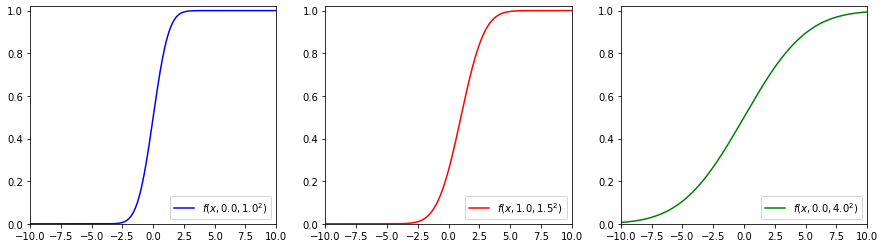

In [4]:
fig, axes = plt.subplots(1, len(mus), figsize=(15,4))

for mu, sigma, color, ax in zip(mus, sigmas, colors, axes):
    x = np.linspace(-10,10,200)
    y = norm.cdf(x,mu,sigma)
    ax.plot(x,y,color, label=u'$f(x,%.01f,%.01f^2)$'%(mu,sigma))
    ax.set_ylim((0,1.02))
    ax.set_xlim((-10,10))
    ax.legend(loc='lower right')

## Beispiel: Das Gewicht von Neugeborenen

Baby Smile bietet eine Babygalerie für Krankenhäuser an, siehe z.B. diese [Webseite](https://www.babygalerie24.de/de_DE/emden/).

Diese Daten lassen sich leicht mit einem kleinen Skript automatisiert auslesen:

In [ ]:
import urllib
import re
from bs4 import BeautifulSoup
from datetime import datetime
from time import sleep


re_datum = re.compile('(\d+)\.(\d+).(\d+)')
re_zeit = re.compile('(\d+)\:(\d+)')
re_gewicht = re.compile('(\d+)\s*g')
re_groesse = re.compile('(\d+)\s*cm')

kliniken = ('emden', 'karl-leisner-klinikum-kleve', 'st-johannes-kamenz', 'weisswasser', 'korbach')
url = 'https://www.babygalerie24.de/de_DE/%s/?page=%d'
neugeborene = pd.DataFrame(columns=['Geburtsdatum', 'Gewicht', 'Größe', 'Geschlecht', 'Klinik'])
class_geschlecht = {'m': 'baby_male', 'w': 'baby_female'}

for klinik in kliniken:
    index = 0
    while True:
        sleep(10)
        index += 1
        data = urllib.request.urlopen(url%(klinik, index)).read()
        s = BeautifulSoup(data, 'html.parser')
        anzahl = 0
        for g in class_geschlecht:
            for female in s.find_all('li', {'class': class_geschlecht[g]}):
                row = {}
                try:
                    title = female.a['title']
                    tag, monat, jahr = re_datum.findall(title)[0]
                    stunde, minute = re_zeit.findall(title)[0]
                    row['Geburtsdatum'] = datetime(int(jahr), int(monat), int(tag), int(stunde), int(minute))
                    row['Gewicht'] = float(re_gewicht.findall(title)[0])
                    row['Größe'] = float(re_groesse.findall(title)[0])
                    row['Geschlecht'] = g
                    row['Klinik'] = klinik
                except (ValueError, IndexError):
                    continue
                neugeborene = neugeborene.append(row, ignore_index=True)
                anzahl += 1
        if anzahl == 0:
            break

In [5]:
# neugeborene.to_pickle('neugeborene.pkl')
# alternativ laden wir die Daten aus einer Datei
neugeborene = pd.read_pickle('neugeborene.pkl')

In [6]:
neugeborene

,Geburtsdatum,Gewicht,Größe,Geschlecht,Klinik
0,2020-02-23 08:10:00,4130.0,54.0,m,emden
1,2020-02-18 13:51:00,3250.0,52.0,m,emden
2,2020-02-03 08:26:00,3350.0,52.0,m,emden
3,2020-01-30 23:45:00,4020.0,55.0,m,emden
4,2020-01-29 19:20:00,3730.0,53.0,m,emden
...,...,...,...,...,...
3359,2017-10-10 12:31:00,3340.0,50.0,w,korbach
3360,2017-10-06 23:28:00,3310.0,51.0,w,korbach
3361,2017-09-27 05:54:00,3800.0,53.0,w,korbach
3362,2017-09-20 22:00:00,3650.0,53.0,w,korbach


In [7]:
# Statistik nach Klinik gruppiert.
neugeborene.groupby('Klinik').describe()

Gewicht                                           \
                              count         mean         std     min     25%   
Klinik                                                                         
emden                         444.0  3489.340090  513.717368    48.0  3200.0   
karl-leisner-klinikum-kleve  1189.0  3477.445753  483.661498    48.0  3160.0   
korbach                       271.0  3396.549815  429.353084  2060.0  3127.5   
st-johannes-kamenz            992.0  3524.722782  447.502148  2175.0  3220.0   
weisswasser                   468.0  3349.457265  457.278515  1840.0  3080.0   

                                                       Größe             \
                                50%      75%     max   count       mean   
Klinik                                                                    
emden                        3490.0  3826.25  5120.0   444.0  58.430180   
karl-leisner-klinikum-kleve  3460.0  3790.00  5080.0  1189.0  54.324643   
korbach                      3400.0  3650.00  4940.0   271.0  51.538745   
st-johannes-kamenz           3520.0  3822.50  5220.0   992.0  50.555444   
weisswasser                  3347.5  3640.00  5020.0   468.0  50.647436   

                                                                         
                                    std   min   25%   50%   75%     max  
Klinik                                                                   
emden                        144.693003  44.0  50.0  52.0  53.0  3100.0  
karl-leisner-klinikum-kleve   84.370150  45.0  50.0  52.0  53.0  2960.0  
korbach                        2.270049  44.0  50.0  51.0  53.0    59.0  
st-johannes-kamenz             2.101115  43.0  49.0  50.0  52.0    58.0  
weisswasser                    2.323342  42.0  49.0  51.0  52.0    58.0

Als nächstes Berechnen wir das arithmetische Mittel $\overline x$ und die Standardabweichung des Gewichtes der Jungen und Mädchen:

In [8]:
# berechne arithmetisches Mittel und Standardabweichung
mu_j = neugeborene[neugeborene['Geschlecht'] == 'm']['Gewicht'].mean()
mu_m = neugeborene[neugeborene['Geschlecht'] == 'w']['Gewicht'].mean()
sigma_j = neugeborene[neugeborene['Geschlecht'] == 'm']['Gewicht'].std()
sigma_m = neugeborene[neugeborene['Geschlecht'] == 'w']['Gewicht'].std()
print("Jungen: mu = %.01f, sigma = %01f" % (mu_j, sigma_j))
print("Mädchen: mu = %.01f, sigma = %01f" % (mu_m, sigma_m))

Jungen: mu = 3535.4, sigma = 476.677151
Mädchen: mu = 3398.7, sigma = 458.805265


Wir können die Verteilungen graphisch in einem Histogramm darstellen:

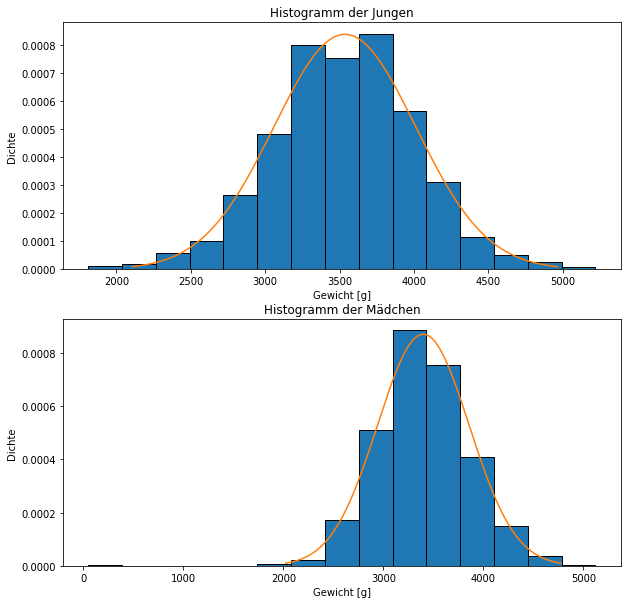

In [10]:
import scipy.stats as stats
fig, ax = plt.subplots(2, 1, figsize=(10,10))

neugeborene[neugeborene['Geschlecht'] == 'm']['Gewicht'].plot(ax=ax[0], kind='hist', density=True, bins=15, edgecolor='k')
x = np.linspace(mu_j-3*sigma_j, mu_j+3*sigma_j,200)
y = norm.pdf(x, mu_j, sigma_j)
ax[0].plot(x,y)
ax[0].set_title('Histogramm der Jungen')
ax[0].set_xlabel('Gewicht [g]')
ax[0].set_ylabel('Dichte')

neugeborene[neugeborene['Geschlecht'] == 'w']['Gewicht'].plot(ax=ax[1], kind='hist', density=True, bins=15, edgecolor='k')
x = np.linspace(mu_m-3*sigma_m, mu_m+3*sigma_m,200)
y = norm.pdf(x, mu_m, sigma_m)
ax[1].plot(x,y)
ax[1].set_title('Histogramm der Mädchen')
ax[1].set_xlabel('Gewicht [g]')
ax[1].set_ylabel('Dichte');

### Frage

Mit welcher Wahrscheinlichkeit werden Mädchen mit einem Gewicht zwischen 3200g und 3800g geboren?

Wie greifen auf das Modell der Normalverteilung zurück. Sei $X_M$ die normalverteilte Zufallsvariable eines Neugeborenen Mädchens mit den Parameter $\mu$ und $\sigma$ von oben. Zu berechnen ist

$$ P(3200 \le X_M \le 3800) = \int_{3200}^{3800} f(x,\mu,\sigma) \; dx $$

Die Dichtefunktion der Normalverteilung besitzt keine elementare Stammfunktion. Deshalb muss das Integral numerisch berechnet oder mit Hilfe von Tabellen nachgeschlagen werden:

Wahrscheinlicheit für das Gewicht eines Neugeborenen Mädchens zwichen 3200g und 3800g: 47.67%
Integrationsfehler: 5.29e-15


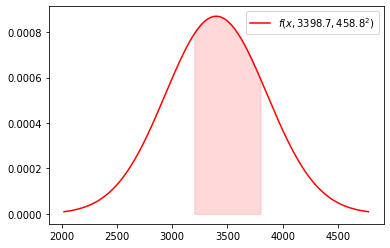

In [11]:
from scipy import integrate
from math import exp, sqrt, pi

def f(x, mu, sigma):
    return exp(-(x-mu)**2/(2*sigma**2)) / (sigma*sqrt(2*pi))

PXM_3200_bis_3800, fehler = integrate.quad(lambda x: f(x,mu_m,sigma_m), 3200, 3800)

print("Wahrscheinlicheit für das Gewicht eines Neugeborenen Mädchens zwichen 3200g und 3800g: %.02f%%" % (100*PXM_3200_bis_3800))
print("Integrationsfehler: %.02e" % fehler)

fig, ax = plt.subplots()
x = np.linspace(mu_m-3*sigma_m, mu_m+3*sigma_m,200)
y = norm.pdf(x,mu_m,sigma_m)
ax.plot(x,y,'red', label=u'$f(x, %.01f, %.01f^2$)'%(mu_m,sigma_m))
x = np.linspace(3200,3800,100)
y = norm.pdf(x,mu_m,sigma_m)
ax.fill_between(x,y,0,color='red',alpha=0.15)
ax.legend()
plt.show()

### Frage

Mit welcher Warscheinlichkeit werden Jungs bzw. Mädchen mit mehr als 5000g geboren?

Die Daten liefern nicht genügend Informationen, um die Frage vernünftig zu beantworten. Es gibt z.B. keinen männlichen Neugeborenen mit mehr als 5000g.

Deshalb greift man auf ein Modell zurück. Wir wählen die Normalverteilung als Modell. Zu berechnen ist dann

$$ P(X_J > 5000) \quad \text{bzw.} \quad P(X_M > 5000), $$

wobei $X_J$ bzw. $X_M$ die normalverteilen Zufallsvariablen für das Gewicht eines Neugeborenen Jungen bzw. Mädchens sind.

Als Parameter für $\mu$ und $\sigma^2$ greift man auf die oben berechneten empirischen Kennzahlen zurück.

Wegen der Symmetrie (an der Geraden $y=\mu$) der Normalverteilung ist für $r \ge \mu$

$$ P(X > r) = \frac{1}{2} - \int_\mu^r f(x,\mu,\sigma) \; dx $$

In [12]:
PXJ = 0.5 - integrate.quad(lambda x: f(x,mu_j,sigma_j), mu_j, 5000)[0]
PXM = 0.5 - integrate.quad(lambda x: f(x,mu_m,sigma_m), mu_m, 5000)[0]

print("Wahrscheinlicheit für das Gewicht eines Neugeborenen mit mehr als 5000g")
print("Jungen:  %.04f" % PXJ)
print("Mädchen: %.04f" % PXM)

Wahrscheinlicheit für das Gewicht eines Neugeborenen mit mehr als 5000g
Jungen:  0.0011
Mädchen: 0.0002


## Ausreißer

In [13]:
neugeborene[neugeborene['Gewicht'] < 500]

,Geburtsdatum,Gewicht,Größe,Geschlecht,Klinik
235,2018-07-16 10:07:00,48.0,3100.0,w,emden
760,2019-07-22 02:40:00,48.0,2960.0,w,karl-leisner-klinikum-kleve
